# Project 1
## Team members:
### Nguyen N
### Brandon H
### Jennifer M
### Sam Y

In [6]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
import numpy as np
from numpy import array

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC # for problem 3

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score # recall scorer
from sklearn.metrics import precision_score # precision scorer
from sklearn.metrics import roc_curve # ROC curve
from sklearn.metrics import f1_score # f1

import nltk
from nltk import pos_tag
#nltk.download("punkt")
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

import pandas as pd


# Getting familiar with the dataset

In [11]:
# from sklearn.datasets import fetch_20newsgroups
# # Refer to the offcial document of scikit-learn for detailed usages:
# # http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
# categories = ['comp.graphics', 'comp.sys.mac.hardware']
# # The 
# twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
# #                                   categories=categories, # choose the categories to load; if is `None`, load all categories
#                                   shuffle=True,
#                                   random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
# #                                   remove=['headers'],
#                                  )
# twenty_test = fetch_20newsgroups(subset='test',
# #                                  categories=categories,
#                                  shuffle=True,
#                                  random_state=42)

## QUESTION 1: To get started, plot a histogram of the number of training documents per category to check if they are evenly distributed. nltk.download()

In [7]:
computer_technology_subclasses = ['comp.graphics',
                                  'comp.os.ms-windows.misc',
                                  'comp.sys.ibm.pc.hardware',
                                  'comp.sys.mac.hardware']

recreational_activity_subclasses = ['rec.autos',
                                    'rec.motorcycles',
                                    'rec.sport.baseball',
                                    'rec.sport.hockey']

categories = computer_technology_subclasses + recreational_activity_subclasses

In [8]:
train_dataset = fetch_20newsgroups(subset='train', categories=categories,
shuffle=True, random_state=42, remove=('headers', 'footers'))

test_dataset = fetch_20newsgroups(subset='test', categories=categories,
shuffle=True, random_state=42, remove=('headers', 'footers'))

comp_tech_train = fetch_20newsgroups(subset='train', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers'))
rec_act_train = fetch_20newsgroups(subset='train', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers'))
comp_tech_test = fetch_20newsgroups(subset='test', categories=computer_technology_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers'))
rec_act_test = fetch_20newsgroups(subset='test', categories=recreational_activity_subclasses, shuffle=True, random_state=42, remove=('headers', 'footers'))


# train_target_names = data_dict['Computer Technology Train']['target_names'] + data_dict['Recreational Activity Train']['target_names']

# test_target = data_dict['Computer Technology Test']['target'] + data_dict['Recreational Activity Test']['target']
# test_target_names = data_dict['Computer Technology Test']['target_names'] + data_dict['Recreational Activity Test']['target_names']



# Turn Multiclass into Binary

In [9]:
binary_train_target = train_dataset.target.copy()
binary_test_target = test_dataset.target.copy()
computer_class_indices = [0,1,2,3]
recreational_class_indices = [4,5,6,7]

computer_class_label = 0
recreational_class_label = 1

# Binarize computer-class labels
for i in computer_class_indices:
    binary_train_target[binary_train_target == i] = computer_class_label
    binary_test_target[binary_test_target == i] = computer_class_label

# Binarize recreational-class labels
for i in recreational_class_indices:
    binary_train_target[binary_train_target==i] = recreational_class_label
    binary_test_target[binary_test_target == i] = recreational_class_label
 
print("Sanity Check!\n")
print("Training Set")
print("Original train_dataset.target: " + str(train_dataset.target[0:20]))
print("Binarized train_dataset.target:" + str(binary_train_target[0:20]))
print("\nTest Set")
print("Original test_dataset.target:  " + str(test_dataset.target[0:20]))
print("Binarized test_dataset.target: " + str(binary_test_target[0:20]))

Sanity Check!

Training Set
Original train_dataset.target: [6 7 4 2 1 3 0 7 5 3 0 5 5 5 3 1 3 0 0 2]
Binarized train_dataset.target:[1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0]

Test Set
Original test_dataset.target:  [3 2 3 3 2 3 2 6 0 1 0 1 7 7 1 5 7 2 0 1]
Binarized test_dataset.target: [0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0]


In [15]:
def plot_histogram(dataset_target, dataset_target_names):
    number_of_documents = []

    for i in range(len(dataset_target_names)):
        number_of_documents.append(len([x for x in dataset_target if x == i]))

    #plot histogram
    x_labels = dataset_target_names
    fig, ax = plt.subplots()
    ax.set_xticks([i+0.35 for i in range(1,9)])
    ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize = 12)

    rects = plt.bar([i for i in range(1,9)], number_of_documents, align='edge')
    plt.xlabel('Topics', fontsize = 14)
    plt.ylabel('Number of Documents', fontsize = 14)
    plt.title('Number of documents per topic ', fontsize = 18)
    plt.axis([0.5,9,0,1100])

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%d' % int(height), ha='center', va='bottom')
    print('Length: ' + str(len(dataset_target)))
    plt.show()


Train Dataset
Length: 4732


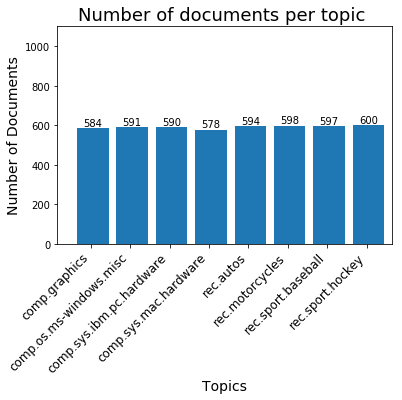

Test Dataset
Length: 3150


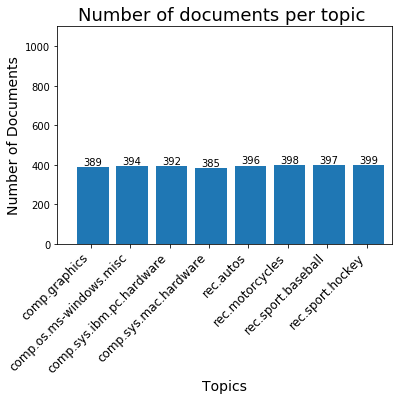

In [16]:
print('Train Dataset')
plot_histogram(train_dataset.target, train_dataset.target_names)

print('Test Dataset')
plot_histogram(test_dataset.target, test_dataset.target_names)

# Binary Classification

## 1. Feature Extraction

## QUESTION 2: Use the following specs to extract features from the textual data:
## • Use the default stopwords of the CountVectorizer
## • Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)
## • Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag
## • Use min_df=3
## Report the shape of the TF-IDF matrices of the train and test subsets respectively.

In [17]:
# we need to Lemmatize this.
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_parse(text):
    wnl = nltk.wordnet.WordNetLemmatizer()
    lemmatize = []
    for word, tag in pos_tag(nltk.word_tokenize(text)):
        if(word.isdigit() or word.isalpha()):
            lemmatize.append(wnl.lemmatize(word.lower(), pos=penn2morphy(tag)))
    return lemmatize

In [ ]:
# set lemmatize 

train_data_lemmatized = []
for item in train_dataset.data:
    train_data_lemmatized.append(' '.join(lemmatize_parse(item)))
    
test_dataset_lemmatized = []
for item in test_dataset.data:
    test_dataset_lemmatized.append(' '.join(lemmatize_parse(item)))
    
train_dataset.data = train_data_lemmatized
test_dataset.data = test_dataset_lemmatized

In [ ]:
# vectorize - fit and transform
vectorizer = CountVectorizer(min_df=3, stop_words='english')
X_train_counts = vectorizer.fit_transform(train_dataset.data)
X_test_counts = vectorizer.transform(test_dataset.data)

In [ ]:
# generate TFxIDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)


In [ ]:
X_train_tfidf.shape

In [ ]:
X_test_tfidf.shape

## 2. Dimensionality Reduction

## QUESTION 3: Reduce the dimensionality of the data using the methods above
## • Apply LSI to the TF-IDF matrix corresponding to the 8 categories with k = 50;
## so each document is mapped to a 50-dimensional vector.
## • Also reduce dimensionality through NMF and compare with LSI:
## Which one is larger?

In [ ]:
# using LSI
lsi = TruncatedSVD(n_components = 50,n_iter = 10, random_state = 42)
lsi_train = lsi.fit_transform(X_train_tfidf)
lsi_test = lsi.fit_transform(X_test_tfidf)
print('LSI train:')
print(lsi_train.shape)
print('LSI test:')
print(lsi_test.shape)
print('')

# using NMF
nmf = NMF(n_components=50, init='random', random_state=42)
nmf_train = nmf.fit_transform(X_train_tfidf)
nmf_test = nmf.fit_transform(X_test_tfidf)
print('NMF train:')
print(nmf_train.shape)
print('NMF test:')
print(nmf_test.shape)
print('')


## QUESTION 4: Hard margin and soft margin linear SVMs:
## • Train two linear SVMs and compare:
## – Train one SVM with y= 1000 (hard margin), another with y= 0:0001 (soft margin).
## – Plot the ROC curve, report the confusion matrix and calculate the accuracy,
## recall, precision and F-1 score of both SVM classifier. Which
## one performs better?
## – What happens for the soft margin SVM? Why is the case?
## • Use cross-validation to choose y:
## Using a 5-fold cross-validation, find the best value of the parameter 
##  in the range f10kj 􀀀 3  k  3; k 2 Zg. Again, plot the ROC curve and report the
## confusion matrix and calculate

In [ ]:
# # methods = ['LSI', 'NMF']
# # min_df = [3]
# # fprs = []
# # tprs = []
# # conf_matrices = []

# def predict(methods, lsi_train, lsi_test, nmf_train, nmf_test, train_dataset):
#     for method in methods:
#         for ga in [1000, 0.001]:
#             if method.upper() == 'LSI':
#                 svc = svm.SVC(gamma = ga, kernel='linear', probability = True)
#                 svc.fit(lsi_train, )
            
#         #Use the SVC method and enable probability estimates
#         svc = 
#         #fitting the model
#         svc.fit()
        

In [ ]:
svc_hard = svm.SVC(gamma = 1000, kernel='linear', probability = True)
svc_hard.fit(lsi_train, train_dataset.target)

predicted = svc_hard.predict(lsi_test)

In [ ]:
print('Accuracy: ' + str(metrics.accuracy_score(test_dataset['target'].ravel(), predicted)))
print('Precision: ' + str(metrics.precision_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('Recall: ' + str(metrics.recall_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('F-1 Score: ' + str(metrics.f1_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print(pd.crosstab(test_dataset['target'].ravel(), predicted, rownames=['True'], colnames=['Predicted'], margins=True))

In [ ]:
svc_soft = svm.SVC(gamma = 0.0001, kernel='linear', probability = True)
svc_soft.fit(lsi_train, train_dataset.target)

predicted = svc_soft.predict(lsi_test)

In [ ]:
print('Accuracy: ' + str(metrics.accuracy_score(test_dataset['target'].ravel(), predicted)))
print('Precision: ' + str(metrics.precision_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('Recall: ' + str(metrics.recall_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('F-1 Score: ' + str(metrics.f1_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print(pd.crosstab(test_dataset['target'].ravel(), predicted, rownames=['True'], colnames=['Predicted'], margins=True))

In [ ]:
svc_hard = svm.SVC(gamma = 1000, kernel='linear', probability = True)
svc_hard.fit(nmf_train, train_dataset.target)

predicted = svc_hard.predict(nmf_test)

In [ ]:
print('Accuracy: ' + str(metrics.accuracy_score(test_dataset['target'].ravel(), predicted)))
print('Precision: ' + str(metrics.precision_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('Recall: ' + str(metrics.recall_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('F-1 Score: ' + str(metrics.f1_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print(pd.crosstab(test_dataset['target'].ravel(), predicted, rownames=['True'], colnames=['Predicted'], margins=True))

In [ ]:
svc_soft = svm.SVC(gamma = 0.0001, kernel='linear', probability = True)
svc_soft.fit(nmf_train, train_dataset.target)

predicted = svc_soft.predict(nmf_test)

In [ ]:
print('Accuracy: ' + str(metrics.accuracy_score(test_dataset['target'].ravel(), predicted)))
print('Precision: ' + str(metrics.precision_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('Recall: ' + str(metrics.recall_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print('F-1 Score: ' + str(metrics.f1_score(test_dataset['target'].ravel(), predicted, average='weighted')))
print(pd.crosstab(test_dataset['target'].ravel(), predicted, rownames=['True'], colnames=['Predicted'], margins=True))

# roc curve plotting functions

In [ ]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

# EXAMPLE USE:
# fit_predict_and_plot_roc(pipeline1, twenty_train.data, twenty_train.target, twenty_test.data, twenty_test.target)

In [ ]:
#hard margin
hard_svm = svm.SVC(kernel='linear', gamma = 1000)
hard_svm.fit(X_train_tfidf, train_dataset.target)


In [ ]:
predicted = hard_svm.predict(X_test_tfidf.toarray())

In [ ]:
pd.crosstab(test_dataset['target'].ravel(), predicted, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
# soft-margin SVC
svc_softmargin = SVC(kernel='linear', gamma=0.0001)

In [ ]:
# combined X training matrices for iteraiton
X_news = [X_train_tfidf, svd_res, nmf_res]
# X_news_test = [X_test_tfidf, , ]
# y training
y_news = train_dataset.target
# y_test
y_news_test = test_dataset.target

In [ ]:
# print out SVC soft-margin ROC, Confusion, Accuracy, Recall, Precision for tfidf, lsi, nmf datasets
labels = ['TFIDF', 'LSI', 'NMF']
for idx, x in enumerate(X_news):
    svc_softmargin.fit(x, y_news)
    svc_softmargin_pred = svc_softmargin.predict(x)
    #svc_softmargin_roc = roc_curve(y_true=y_news, y_score=svc_softmargin_pred)
    svc_softmargin_confusion = confusion_matrix(y_true=y_news, y_pred=svc_softmargin_pred)
    svc_softmargin_accuracy = accuracy_score(y_true=y_news, y_pred=svc_softmargin_pred)
    #svc_softmargin_recall = recall_score(y_true=y_news, y_pred=svc_softmargin_pred, average='samples')
    #svc_softmargin_precision = precision_score(y_true=y_news, y_pred=svc_softmargin_pred)
    #svc_softmargin_f1 = f1_score(y_true=y_news, y_pred=svc_softmargin_pred)
    #print("Training-set SVC Soft-margin " + labels[idx] + " ROC curve: " + svc_softmargin_roc)
    print("Training-set SVC Soft-margin " + labels[idx] + " Confusion matrix: " + str(svc_softmargin_confusion))
    print("Training-set SVC Soft-margin " + labels[idx] + " Accuracy Score: " + str(svc_softmargin_accuracy))
    #print("Training-set SVC Soft-margin " + labels[idx] + " Recall Score: " + svc_softmargin_recall)
    #print("Training-set SVC Soft-margin " + labels[idx] + " Precision Score: " + svc_softmargin_precision)
    #print("Training-set SVC Soft-margin " + labels[idx] + " F1 Score: " + svc_softmargin_f1)

# GridSearchCV

In [ ]:
# GridSearch, 5-fold CV
svc = SVC()
param_grid = {'gamma':np.arange(0.001, 1000)}
gs_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
gs_svc.fit(X_tfidf, y_news)
# best gamma:
best_gamma = gs_svc.best_estimator_
print("Optimal gamma for SVC: " + best_gamma)

In [ ]:
# SVC using best gamma for dataset
svc_bestgamma = SVC(gamma=best_gamma)

In [ ]:
for idx, x in enumerate(X_news):
    svc_bestgamma.fit(x, y_news)
    svc_bestgamma_pred = svc_bestgamma.predict(x)
    #svc_bestgamma_roc = roc_curve(y_true=y_news, y_score=svc_bestgamma_pred)
    svc_bestgamma_confusion = confusion_matrix(y_true=y_news, y_pred=svc_bestgamma_pred)
    svc_bestgamma_accuracy = accuracy_score(y_true=y_news, y_pred=svc_bestgamma_pred)
    #svc_bestgamma_recall = recall_score(y_true=y_news, y_pred=svc_bestgamma_pred)
    #svc_bestgamma_precision = precision_score(y_true=y_news, y_pred=svc_bestgamma_pred)
    #svc_bestgamma_f1 = f1_score(y_true=y_news, y_pred=svc_bestgamma_pred)
    #print("SVC Best-gamma " + labels[idx] + " ROC curve: " + svc_bestgamma_roc)
    print("SVC Best-gamma " + labels[idx] + " Confusion matrix: " + str(svc_bestgamma_confusion))
    print("SVC Best-gamma " + labels[idx] + " Accuracy Score: " + str(svc_bestgamma_accuracy))
    #print("SVC Best-gamma " + labels[idx] + " Recall Score: " + str(svc_bestgamma_recall))
    #print("SVC Best-gamma " + labels[idx] + " Precision Score: " + str(svc_bestgamma_precision))
    #print("Training-set SVC Best-gamma " + labels[idx] + " F1 Score: " + str(svc_bestgamma_f1))

# Logistic Regression

In [ ]:
logistic = LogisticRegression()
logistic.fit(lsi_train, train_dataset.target)

logistic_predictions = logistic.predict(lsi_test)


In [ ]:
train_dataset.target[0:10]

# NaiveBayes Classifier

In [ ]:
# NaiveBayes classifier
mnb = MultinomialNB()
labels = ['TFIDF', 'LSI', 'NMF']
for idx, x in enumerate(X_news):
    mnb.fit(x, y_news)
    mnb_pred = mnb.predict(x)
    #mnb_roc = roc_curve(y_true=y_news, y_score=mnb_pred)
    mnb_confusion = confusion_matrix(y_true=y_news, y_pred=mnb_pred)
    mnb_accuracy = accuracy_score(y_true=y_news, y_pred=mnb_pred)
    #mnb_recall = recall_score(y_true=y_news, y_pred=mnb_pred)
    #mnb_precision = precision_score(y_true=y_news, y_pred=mnb_pred)
    #mnb_f1 = f1_score(y_true=y_news, y_pred=mnb_pred)
    #print("Multinomial Naive Bayes " + labels[idx] + " ROC curve: " + str(mnb_roc))
    print("Multinomial Naive Bayes " + labels[idx] + " Confusion matrix: " + str(mnb_confusion))
    print("Multinomial Naive Bayes " + labels[idx] + " Accuracy Score: " + str(mnb_accuracy))
    #print("Multinomial Naive Bayes " + labels[idx] + " Recall Score: " + str(mnb_recall))
    #print("Multinomial Naive Bayes " + labels[idx] + " Precision Score: " + str(mnb_precision))
    #print("Training-set SVC Best-gamma " + labels[idx] + " F1 Score: " + str(mnb_f1))

# Grid Search of Parameters

In [ ]:
# construct Pipeline - fe, dr, clf

In [ ]:
best_gamma = 10

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
%%capture
# used to cache results
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(random_state=0)),
    ('clf', GaussianNB()),
],
memory=memory
)

param_grid = [
    {
        'vect__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(), NMF()],
        #'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [SVC(kernel='linear', gamma=best_gamma)]
    },
    {
        'vect__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(), NMF()],
        #'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [LogisticRegression()],
        'clf__penalty': ['11', 'l2']
    },
    {
        'vect__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(), NMF()],
        #'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'clf': [GaussianNB()]
    },
]
# reducer_labels = ['LinearSVC', 'NMF', 'KBest(chi2)']

grid1 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid2 = GridSearchCV(pipeline, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')

# with headers and footers
grid1.fit(train_dataset.data, binary_train_target)
# NO headers and footers
twenty_train_noheadfoot = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers'), shuffle=True, random_state=42)

binary_train_target_noheadfoot = [0 if t<4 else 1 for t in twenty_train_noheadfoot.target]

grid2.fit(twenty_train_noheadfoot.data, binary_train_target_noheadfoot)
rmtree(cachedir)

In [ ]:
import pandas as pd
pd.DataFrame(grid1.cv_results_)

In [ ]:
pd.DataFrame(grid2.cv_results_)

# Multiclass Classification



In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:

# 1. get categories
multi_categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'misc.forsale', 'soc.religion.christian']
# 2. clean dataset, tokenize, remove stop words and punctuation, and stem
multi_data = fetch_20newsgroups(subset='train', categories=multi_categories, shuffle=True, random_state=42)
multi_data_cleaned = vectorizer.fit_transform(multi_data.data)
multi_data_test = fetch_20newsgroups(subset='test', categories=multi_categories, shuffle=True, random_state=42)
multi_data_test_cleaned = vectorizer.fit_transform(multi_data.data)

In [ ]:
multiclass_data = multi_data_cleaned
multiclass_data_test = multi_data_test_cleaned
# transform data for TFIDF, LSI, NMF comparison
tfidf_multi = tfidf_transformer.fit_transform(multiclass_data).toarray()
lsi_multi = lsi.fit_transform(multiclass_data)
nmf_multi = nmf.fit_transform(multiclass_data)

tfidf_multi_test = tfidf_transformer.fit_transform(multiclass_data_test).toarray()
lsi_multi_test = lsi.fit_transform(multiclass_data_test)
nmf_multi_test = nmf.fit_transform(multiclass_data_test)

In [ ]:
X_multi = [tfidf_multi, lsi_multi, nmf_multi]
y_multi = multi_data.target
X_multi_test = [tfidf_multi_test, lsi_multi_test, nmf_multi_test]
y_multi_test = multi_data_test.target

In [ ]:
# Naive Bayes
multiclass_NB = MultinomialNB()
labels = ['TFIDF'] # LSI, NMF
for idx, x in enumerate(X_multi):
    if (idx < len(labels)):
        # train model
        multiclass_NB.fit(x, y_multi)
        # get test results
        multiclass_NB_pred = multiclass_NB.predict(X_multi_test[idx])
        multiclass_NB_confusion = confusion_matrix(y_true=y_multi_test, y_pred=multiclass_NB_pred)
        multiclass_NB_accuracy = accuracy_score(y_true=y_multi_test, y_pred=multiclass_NB_pred)
        multiclass_NB_recall = recall_score(y_true=y_multi_test, y_pred=multiclass_NB_pred, average='macro')
        multiclass_NB_precision = precision_score(y_true=y_multi_test, y_pred=multiclass_NB_pred, average='macro')
        multiclass_NB_f1 = f1_score(y_true=y_multi_test, y_pred=multiclass_NB_pred, average='macro')
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Confusion matrix: \n" + str(multiclass_NB_confusion))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Accuracy Score: " + str(multiclass_NB_accuracy))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Recall Score: " + str(multiclass_NB_recall))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " Precision Score: " + str(multiclass_NB_precision))
        print("Multiclass NaiveBayes " + str(labels[idx]) + " f1 Score: " + str(multiclass_NB_f1))





In [ ]:
# Multiclass SVM classification
multiclass_svm_OvO = OneVsOneClassifier(LinearSVC())
multiclass_svm_OvR = OneVsRestClassifier(LinearSVC())

In [ ]:
labels = ['TFIDF'] #, 'LSI', 'NMF'
for idx, x in enumerate(X_multi):
    if (idx < len(labels)):
        # train model
        multiclass_svm_OvO.fit(x, y_multi)
        # get test results
        multiclass_svm_OvO_pred = multiclass_svm_OvO.predict(X_multi_test[idx])
        multiclass_svm_OvO_confusion = confusion_matrix(y_true=y_multi_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_accuracy = accuracy_score(y_true=y_multi_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_recall = recall_score(y_true=y_multi_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_precision = precision_score(y_true=y_multi_test, y_pred=multiclass_svm_OvO_pred)
        multiclass_svm_OvO_f1 = f1_score(y_true=y_multi_test, y_pred=multiclass_svm_OvO_pred)
        print("Multiclass SVM OvO " + labels[idx] + " Confusion matrix: \n" + str(multiclass_svm_OvO_confusion))
        print("Multiclass SVM OvO " + labels[idx] + " Accuracy Score: " + str(multiclass_svm_OvO_accuracy))
        print("Multiclass SVM OvO " + labels[idx] + " Recall Score: " + str(multiclass_svm_OvO_recall))
        print("Multiclass SVM OvO " + labels[idx] + " Precision Score: " + str(multiclass_svm_OvO_precision))
        print("Multiclass SVM OvO " + labels[idx] + " f1 Score: " + str(multiclass_svm_OvO_f1))



In [ ]:
labels = ['TFIDF'] # , 'LSI', 'NMF'
for idx, x in enumerate(X_multi):
    if (idx < len(labels)):
        # train model
        multiclass_svm_OvR.fit(x, y_multi)
        # get test results
        multiclass_svm_OvR_pred = multiclass_svm_OvR.predict(X_multi_test[idx])
        multiclass_svm_OvR_confusion = confusion_matrix(y_true=y_multi_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_accuracy = accuracy_score(y_true=y_multi_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_recall = recall_score(y_true=y_multi_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_precision = precision_score(y_true=y_multi_test, y_pred=multiclass_svm_OvR_pred)
        multiclass_svm_OvR_f1 = f1_score(y_true=y_multi_test, y_pred=multiclass_svm_OvR_pred)
        print("Multiclass SVM OvR " + labels[idx] + " Confusion matrix: \n" + str(multiclass_svm_OvR_confusion))
        print("Multiclass SVM OvR " + labels[idx] + " Accuracy Score: " + str(multiclass_svm_OvR_accuracy))
        print("Multiclass SVM OvR " + labels[idx] + " Recall Score: " + str(multiclass_svm_OvR_recall))
        print("Multiclass SVM OvR " + labels[idx] + " Precision Score: " + str(multiclass_svm_OvR_precision))
        print("Multiclass SVM OvR " + labels[idx] + " f1 Score: " + str(multiclass_svm_OvR_f1))

